In [16]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
np.random.seed(1)

In [17]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [18]:
print(f"X shape: {X_train.shape}, X Type: {type(X_train)}")
print(f"y shape: {y_train.shape},   y Type: {type(y_train)}")

X shape: (3, 4), X Type: <class 'numpy.ndarray'>
y shape: (3,),   y Type: <class 'numpy.ndarray'>


In [19]:
b_init = 732.
w_init = np.random.rand(4)
w_init

array([4.17e-01, 7.20e-01, 1.14e-04, 3.02e-01])

In [20]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0 # prediction
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p += b
    return p

In [21]:
# prediction of a single row
x_vec = X_train[0,:]
print(f"x_vec Shape: {x_vec.shape}, x_vec Values: {x_vec}")
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec Shape: (4,), x_vec Values: [2104    5    1   45]
f_wb shape: (), prediction: 1626.6210005046764


In [22]:
# prediction of a single row
x_vec = X_train[0,:]
print(f"x_vec Shape: {x_vec.shape}, x_vec Values: {x_vec}")

f_wb = np.dot(X_train[0,:], w_init) + b_init
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec Shape: (4,), x_vec Values: [2104    5    1   45]
f_wb shape: (), prediction: 1626.6210005046764


### Cost Function

In [23]:
def cost_function(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

In [24]:
cost = cost_function(X_train, y_train, w_init, b_init)
print(f"Cost is: {cost}")

Cost is: 571722.3481919497


### Computing Gradient

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}   \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$

In [25]:
def compute_gradient(x, y, w, b):
    m,n = x.shape # m = 3, n = 4
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        error = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i, j]
        dj_db = dj_db + error
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [26]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f"dj/db at initial w,b: {tmp_dj_db}")
print(f"dj/dw at initial w,b: {tmp_dj_dw}")

dj/db at initial w,b: 1064.2346052363885
dj/dw at initial w,b: [1.60e+06 3.66e+03 1.43e+03 4.30e+04]


### Gradient Descent

In [27]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 1000000:
            J_history.append(cost_function(x, y, w, b))

            if i % math.ceil(num_iters / 10) == 0:
                print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

In [34]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

alpha = 0.0000001
iterations = 2000000

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            cost_function, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]} ")

Iteration    0: Cost 28989.11
Iteration 200000: Cost   574.73
Iteration 400000: Cost   566.01
Iteration 600000: Cost   560.58
Iteration 800000: Cost   555.29
b,w found by gradient descent: 0.00, [ 0.24  1.1  -3.12 -1.48]
prediction: 440.17, target value: 460 
prediction: 277.36, target value: 232 
prediction: 151.60, target value: 178 


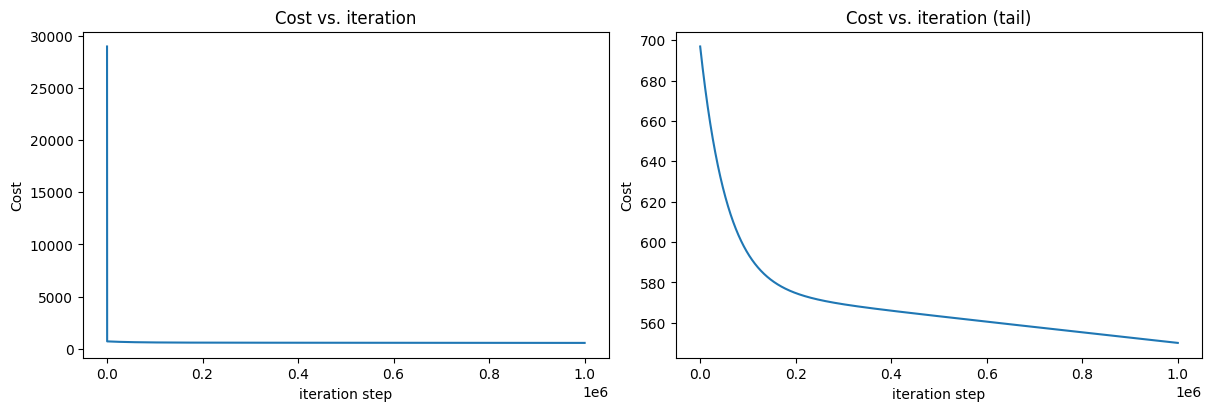

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()